In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [3]:
%cd C:\Users\Faiz\Desktop\Data

C:\Users\Faiz\Desktop\Data


In [4]:
df1= pd.read_csv('Salary_Data.csv')
print (df1)


    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [5]:
x = df1.iloc[:,:-1].values
print (x)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [6]:
y = df1.iloc[:,1].values
print (y)


[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


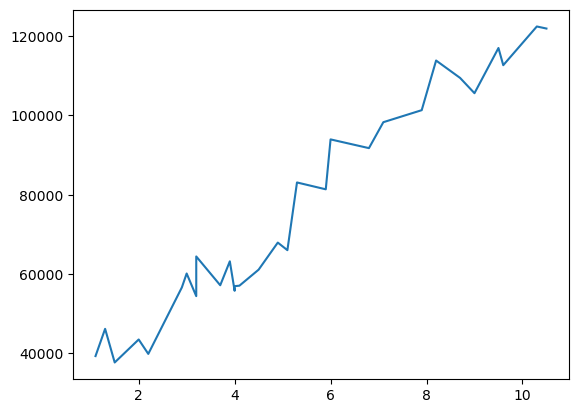

In [7]:
plt.plot(x,y)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)


X Shape- (30, 1)
Y Shape- (30,)
X_Train Shape- (24, 1)
Y_Train Shape- (24,)
X_Test Shape- (6, 1)
Y_Test Shape- (6,)


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)


array([ 59735.64753645,  51857.85855882,  34132.83335915, 101094.03966902,
       111925.99951326,  36102.28060355])

In [10]:
y_pred = lr.predict(x_test)

In [11]:
df_x_test =pd.DataFrame(x_test, columns = ['Experience'])
df_y_test= pd.DataFrame(y_test, columns = ['Salary'])
df_y_test_pred =  pd.DataFrame(y_pred, columns = ['Prediction'])
df_diff =df_y_test- df_y_test_pred
y_test_pred = pd.concat ([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference'] =df_y_test ['Salary']- df_y_test_pred['Prediction']
print (y_test_pred)


   Experience  Salary     Prediction    Difference
0         3.7   57189   59735.647536  -2546.647536
1         2.9   56642   51857.858559   4784.141441
2         1.1   39343   34132.833359   5210.166641
3         7.9  101302  101094.039669    207.960331
4         9.0  105582  111925.999513  -6343.999513
5         1.3   46205   36102.280604  10102.719396


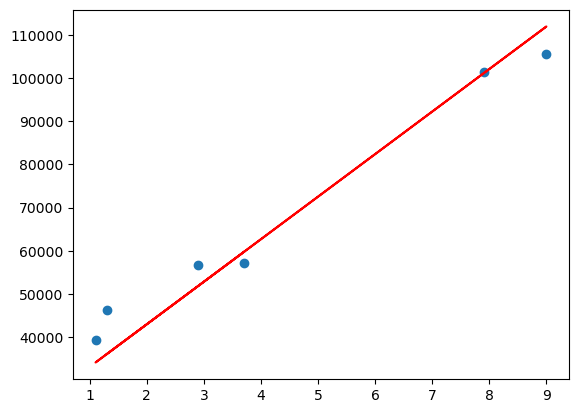

In [12]:
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()


In [13]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)


0.9510531375314599


In [14]:
lr.coef_

array([9847.23622204])

In [15]:
lr.intercept_

23300.873514900784

In [16]:
print(y_test_pred)

   Experience  Salary     Prediction    Difference
0         3.7   57189   59735.647536  -2546.647536
1         2.9   56642   51857.858559   4784.141441
2         1.1   39343   34132.833359   5210.166641
3         7.9  101302  101094.039669    207.960331
4         9.0  105582  111925.999513  -6343.999513
5         1.3   46205   36102.280604  10102.719396


In [18]:
y_pred_final= lr.predict (x)
print (y_pred_final)


[ 34132.83335915  36102.28060355  38071.72784796  42995.34595898
  44964.79320339  51857.85855882  52842.58218102  54812.02942543
  54812.02942543  59735.64753645  61705.09478086  62689.81840306
  62689.81840306  63674.54202527  67613.43651408  71552.3310029
  73521.77824731  75491.22549171  81399.56722494  82384.29084714
  90262.07982477  93216.25069139 101094.03966902 104048.21053563
 108971.82864665 111925.99951326 116849.61762428 117834.34124649
 124727.40660192 126696.85384632]


In [19]:
y_pred_final = pd.DataFrame(y_pred_final,columns= ['Prediction'])
result = pd.concat([df1,y_pred_final], axis =1)
result['Difference'] = result['Salary'] - result['Prediction']
print (result)


    YearsExperience  Salary     Prediction    Difference
0               1.1   39343   34132.833359   5210.166641
1               1.3   46205   36102.280604  10102.719396
2               1.5   37731   38071.727848   -340.727848
3               2.0   43525   42995.345959    529.654041
4               2.2   39891   44964.793203  -5073.793203
5               2.9   56642   51857.858559   4784.141441
6               3.0   60150   52842.582181   7307.417819
7               3.2   54445   54812.029425   -367.029425
8               3.2   64445   54812.029425   9632.970575
9               3.7   57189   59735.647536  -2546.647536
10              3.9   63218   61705.094781   1512.905219
11              4.0   55794   62689.818403  -6895.818403
12              4.0   56957   62689.818403  -5732.818403
13              4.1   57081   63674.542025  -6593.542025
14              4.5   61111   67613.436514  -6502.436514
15              4.9   67938   71552.331003  -3614.331003
16              5.1   66029   7

In [20]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred_final)
print (accuracy)


0.9550661353310409


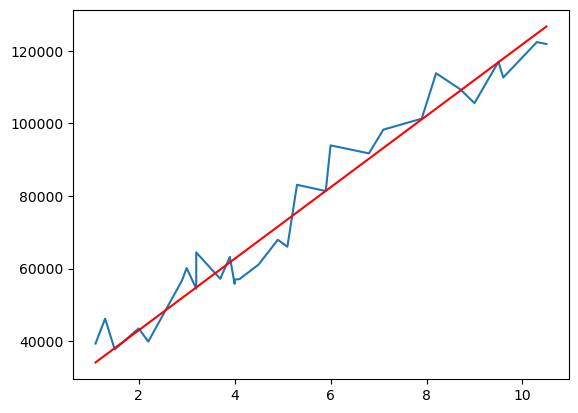

In [21]:
plt.plot(x,y)
plt.plot (x,y_pred_final,'red' )
plt.show()


In [23]:
lr.predict([[15]])#when a person joins with 15 years of experience

array([171009.41684551])